In [60]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

<Axes: >

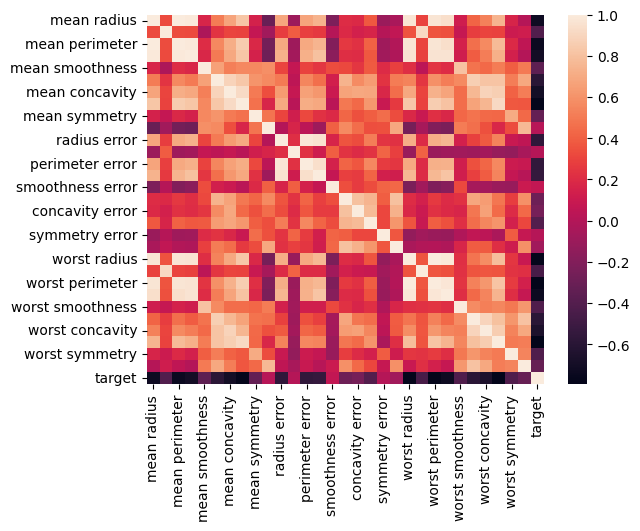

In [62]:
sns.heatmap(df.corr())

In [49]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [50]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [69]:
x = df[["mean radius", "mean texture"]]
y = df.iloc[:, -1].values

In [70]:
print(x.shape)
print(y.shape)

(569, 2)
(569,)


In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=9)

model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [87]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

acc = accuracy_score(y_test,y_pred)
acc

0.8888888888888888

e:\HyperTuna\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


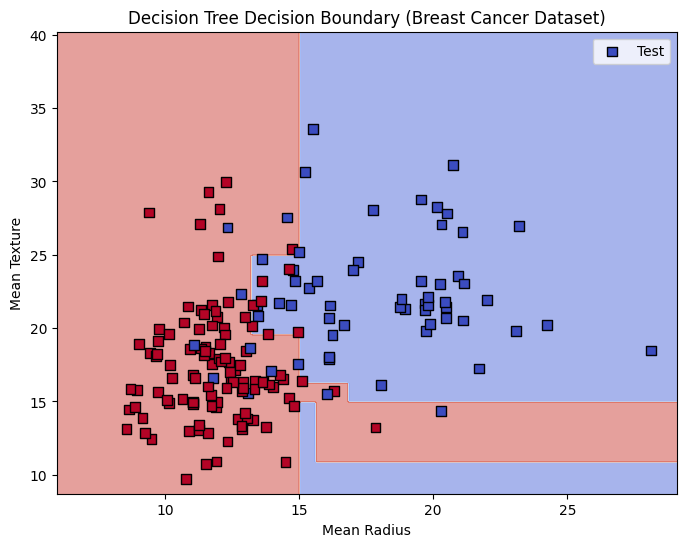

In [88]:
import numpy as np

x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict class labels for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)

# Plot the testing points
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='s', edgecolors='k', s=50, label='Test')

# Adding labels and title
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Decision Tree Decision Boundary (Breast Cancer Dataset)')
plt.legend()
plt.show()

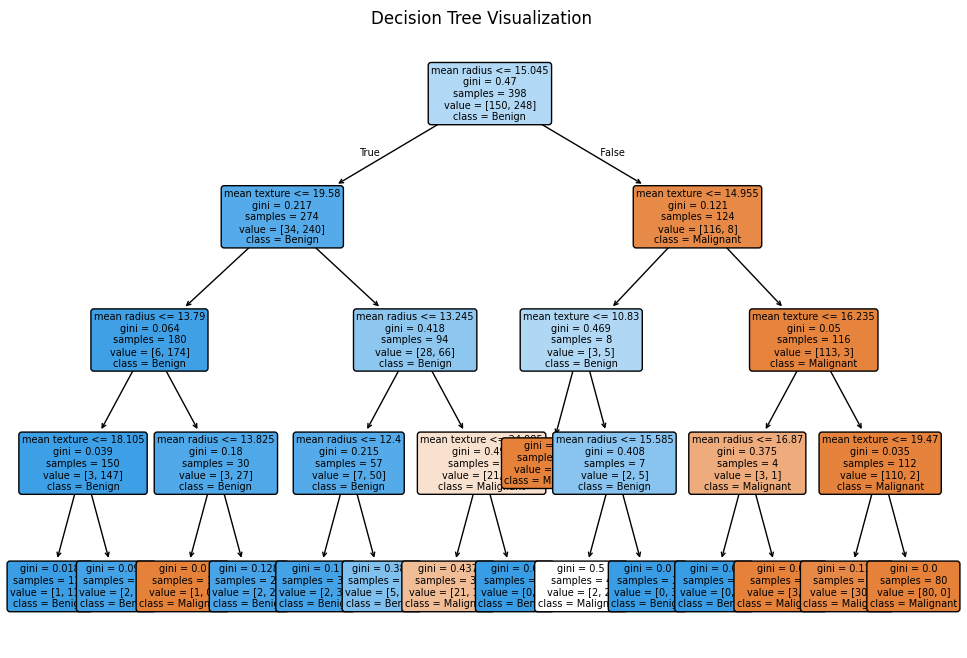

In [94]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you have already trained your model (model = DecisionTreeClassifier(max_depth=2))
# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=x.columns, class_names=["Malignant", "Benign"], rounded=True, fontsize=7)
plt.title('Decision Tree Visualization')
plt.show()